# Date Functionality in Pandas

In [2]:
import pandas as pd
import numpy as np

### Timestamp

In [102]:
#Pandas default: M, D, Y
#can be inteligent
print(pd.Timestamp('9/1/2016 10:05AM'),
      pd.Timestamp('Sep/1/2016 10:05AM'),
      pd.Timestamp('13/1/2016 13'))

2016-09-01 10:05:00 2016-09-01 10:05:00 2016-01-13 13:00:00


### Period

In [4]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [5]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

### DatetimeIndex

In [105]:
#pd.Timestamp as index: DatetimeIndex

t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
print(t1,t1.index)

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object DatetimeIndex(['2016-09-01', '2016-09-02', '2016-09-03'], dtype='datetime64[ns]', freq=None)


pandas.tseries.index.DatetimeIndex

### PeriodIndex

In [8]:
#Convert index to Periodindex

#can than groupby
pd.PeriodIndex(['2010-09-01']*3, freq='Q')

PeriodIndex(['2010Q3', '2010Q3', '2010Q3'], dtype='period[Q-DEC]', freq='Q-DEC')

In [107]:
#Period as index: PeriodIndex
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2, type(t2.index)

(2016-09    d
 2016-10    e
 2016-11    f
 Freq: M, dtype: object, pandas.core.indexes.period.PeriodIndex)

### Converting to Datetime

In [10]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,16,46
"Aug 29, 2014",14,66
2015-06-26,59,99
7/12/16,27,17


In [11]:
#.to_datetime() convert to Datetime
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,16,46
2014-08-29,14,66
2015-06-26,59,99
2016-07-12,27,17


In [12]:
#Can specify order other than default
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [13]:
#Datetime - Datetime = Timedeltas
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [108]:
#Can do a lot math..
pd.Timestamp('9/2/2016 8:10AM')
+ pd.Timedelta('12D 3H')

Timedelta('12 days 03:00:00')

### Working with Dates in a Dataframe

In [1]:
import pandas as pd
import numpy as np

In [2]:
#
dates = pd.date_range('10-01-2016', periods=9, 
                      freq='2W-SUN') #so....

dates #DateIndex

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [3]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,99,128
2016-10-16,99,118
2016-10-30,102,129
2016-11-13,102,123
2016-11-27,108,129
2016-12-11,112,128
2016-12-25,113,128
2017-01-08,117,124
2017-01-22,118,120


In [113]:
#check which day in a week 
df.index.weekday_name

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [114]:
#DataFrame function, difference from last cell
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,-2.0,2.0
2016-10-30,7.0,6.0
2016-11-13,6.0,-1.0
2016-11-27,-5.0,4.0
2016-12-11,2.0,-5.0
2016-12-25,0.0,1.0
2017-01-08,0.0,0.0
2017-01-22,5.0,-2.0


In [5]:
#group by month(shown as last day)
df.resample('M').mean()


,Count 1,Count 2
2016-10-31,100.0,125.0
2016-11-30,105.0,126.0
2016-12-31,112.5,128.0
2017-01-31,117.5,122.0


In [20]:
#Support partial indexing
df['2017']

,Count 1,Count 2
2017-01-08,105,125
2017-01-22,101,123


In [21]:
#Support partial indexing
df['2016-12']

,Count 1,Count 2
2016-12-11,109,121
2016-12-25,105,126


In [22]:
#Support partial slicing..
df['2016-12':]

,Count 1,Count 2
2016-12-11,109,121
2016-12-25,105,126
2017-01-08,105,125
2017-01-22,101,123


In [115]:
#Change frequency of DataFrame
df.asfreq('W', method='ffill')#to weekly

,Count 1,Count 2
2016-10-02,107,118
2016-10-09,107,118
2016-10-16,105,120
2016-10-23,105,120
2016-10-30,112,126
2016-11-06,112,126
2016-11-13,118,125
2016-11-20,118,125
2016-11-27,113,129
2016-12-04,113,129


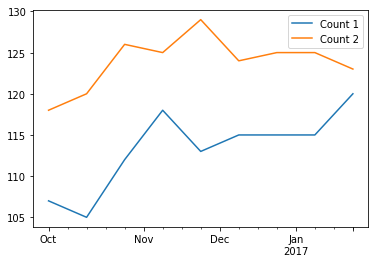

In [119]:
#plot time series
import matplotlib.pyplot as plt
%matplotlib inline #NOT necessary 

df.plot()